In [1]:
import scanpy as sc
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)
%matplotlib inline

In [2]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_151/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [3]:
%%R
library(SCORPIUS)

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [4]:
%%R
data <- readRDS("mesoderm-development_loh (1).rds")
str(data)

List of 21
 $ id                   : chr "real/gold/mesoderm-development_loh"
 $ cell_ids             : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
 $ cell_info            :'data.frame':	504 obs. of  4 variables:
  ..$ cell_id     : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ Run         : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ LibraryName : chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
  ..$ milestone_id: chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
 $ source               : chr "real/gold"
 $ normalisation_info   :List of 3
  ..$ has_spike          : logi TRUE
  ..$ has_mito           : logi TRUE
  ..$ normalisation_steps: tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
  .. ..$ type     : chr [1:6] "original" "cell_quality_filtering" "feature_expression_filtering" "normalisation" ...
  .. ..$ nfeatures: int [1:6] 58480 58480 36347 36347 8772 8772
  .. ..$ ncells   : int [1:6] 651 504 504

In [5]:
%%R
expression <- data$expression
clusters <- as.factor(data$prior_information$groups_id$group_id)
# clusters

In [6]:
# %%R
# data(ginhoux)
# expression <- ginhoux$expression
# group_name <- ginhoux$sample_info$group_name
# print(str(group_name))
# group_name

In [7]:
%%R
space <- reduce_dimensionality(expression, "spearman")

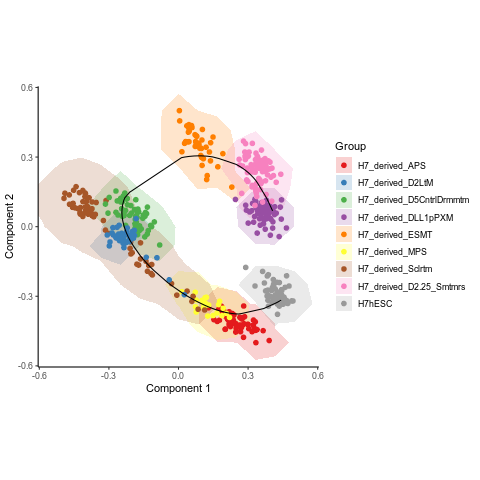

In [8]:
%%R
traj <- infer_trajectory(space)
draw_trajectory_plot(space, clusters, traj$path, contour = TRUE)

In [9]:
%%R
pseudotimes <- traj$time
pseudotimes

  SRR3952323   SRR3952325   SRR3952326   SRR3952327   SRR3952328   SRR3952329 
0.0000000000 0.0000000000 0.0000000000 0.0120198940 0.0000000000 0.0000000000 
  SRR3952330   SRR3952331   SRR3952337   SRR3952341   SRR3952342   SRR3952343 
0.0088389345 0.0019814083 0.0122011147 0.0000000000 0.0000000000 0.0000000000 
  SRR3952344   SRR3952345   SRR3952347   SRR3952348   SRR3952349   SRR3952350 
0.0000000000 0.0118311426 0.0000000000 0.0007421981 0.0000000000 0.0172002600 
  SRR3952351   SRR3952352   SRR3952354   SRR3952355   SRR3952356   SRR3952357 
0.0050908173 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
  SRR3952358   SRR3952360   SRR3952361   SRR3952362   SRR3952363   SRR3952365 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
  SRR3952366   SRR3952367   SRR3952368   SRR3952369   SRR3952372   SRR3952373 
0.0000000000 0.0054268947 0.0000000000 0.0019112140 0.0000000000 0.0000000000 
  SRR3952374   SRR3952375   SRR3952376   SRR3952377 